# Data Preprocessing Tools

In [ ]:
#RESULTS--->
#6.7% accuracy when gender and smoking history column dropped
#if not dropped 4% accuracy
#No good correlation between columns

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
dataset = pd.read_csv('glucose_hba1c.csv')

In [ ]:
X = dataset.iloc[:, [1, 2, 3, 5, 6]].values  # Assuming the last column is the target variable
y = dataset.iloc[:, -1].values

In [ ]:
#RESULTS WHEN ONE HOT ENCODING GENDER AND SMOKING_HISTORY

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# # Assuming you have already loaded your dataset into a DataFrame named 'dataset'
# X = dataset.iloc[:, :-1].values  # Assuming the last column is the target variable
# y = dataset.iloc[:, -1].values

# # Define the column transformer for one-hot encoding
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 4])], remainder='passthrough')

# # Apply the column transformer to X and convert to array
# X_encoded = np.array(ct.fit_transform(X))

# # Create a DataFrame with the transformed features
# X_df = pd.DataFrame(X_encoded)

# # Compute the correlation matrix
# correlation_matrix = X_df.corr()

# # Plot the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()


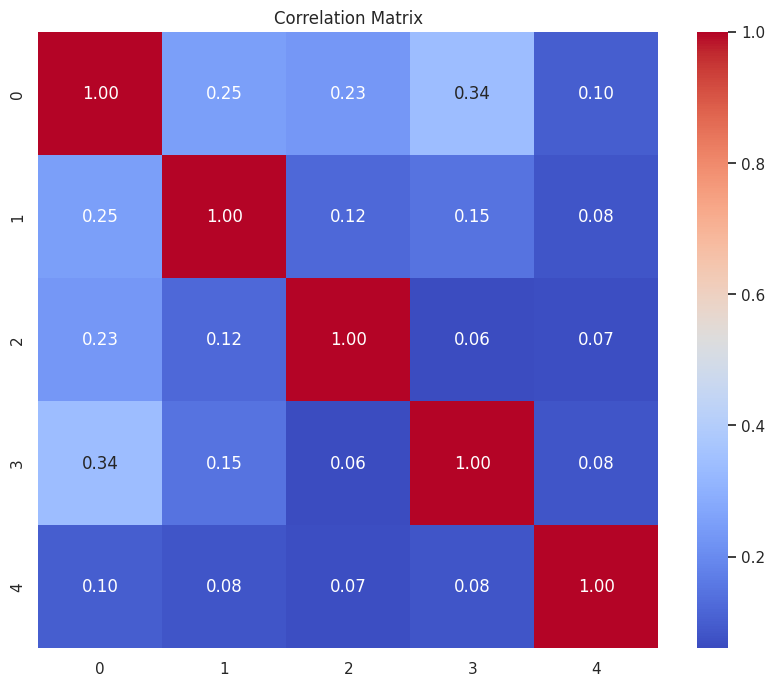

In [ ]:
#RESULTS WHEN GENDER AND SMOKING HISTORY DROPPED
X_df = pd.DataFrame(X)

# Compute the correlation matrix
correlation_matrix = X_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 2.69837920e-01 -2.84670433e-01 -2.03492079e-01  1.34380173e+00
  -1.42570544e+00]
 [ 3.58562299e-01 -2.84670433e-01 -2.03492079e-01  5.04431277e-01
   2.54747299e-01]
 [ 9.35270764e-01 -2.84670433e-01 -2.03492079e-01  1.63412162e+00
  -1.89249787e+00]
 ...
 [ 1.68942799e+00  3.51283409e+00 -2.03492079e-01  1.55445711e-01
   2.54747299e-01]
 [ 4.02924489e-01  3.51283409e+00 -2.03492079e-01  4.54032900e+00
   6.28181241e-01]
 [ 1.64506580e+00 -2.84670433e-01 -2.03492079e-01 -9.96094308e-04
   4.41464270e-01]]


In [ ]:
print(X_test)

[[ 1.37889266e+00 -2.84670433e-01 -2.03492079e-01 -1.06293463e-01
  -4.92120584e-01]
 [-3.06870544e-01 -2.84670433e-01 -2.03492079e-01 -9.96094308e-04
  -9.58913012e-01]
 [-1.73783976e-01 -2.84670433e-01 -2.03492079e-01 -9.96094308e-04
   6.28181241e-01]
 ...
 [ 3.58562299e-01  3.51283409e+00 -2.03492079e-01 -4.04134593e-01
  -6.78837555e-01]
 [-5.28681492e-01 -2.84670433e-01 -2.03492079e-01 -8.71955761e-01
   1.00161518e+00]
 [ 1.29016828e+00 -2.84670433e-01 -2.03492079e-01 -9.96094308e-04
  -6.78837555e-01]]


#MODELS

In [ ]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [ ]:
#RESULTS WHEN GENDER AND SMOKING DROPPED

In [ ]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,31.023000,1543.505000,0.067000
Linear Regression,30.728000,1582.598000,0.044000
Support Vector Machines,30.212000,1591.227000,0.038000
Random Forest,32.849000,1726.664000,-0.044000
Decision Tree,40.175000,2779.919000,-0.680000
K-nearest Neighbors,41.799000,2992.242000,-0.808000


--------------------------------------